In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import parse
import plotly.graph_objs as go
import plotly.offline as py

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
dados = pd.read_csv(r'C:\Users\bcn20\Desktop\enem\ENEM_1999.csv', delimiter=';', encoding='iso-8859-1', usecols=['NU_IDADE', 'TP_SEXO', 'NO_MUNICIPIO_RESIDENCIA', 'TP_PRESENCA'])
dados    #COMANDO PARA ABRIR O ARQUIVO E COLUNAS ESPECIFICAS

,NU_IDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,TP_PRESENCA
0,18.0,F,MANAUS,0
1,26.0,M,MANAUS,1
2,25.0,M,MANAUS,1
3,21.0,F,MANAUS,1
4,21.0,F,MANAUS,0
...,...,...,...,...
346948,17.0,M,TUPA,1
346949,17.0,M,ESTRELA DOESTE,1
346950,18.0,M,URANIA,1
346951,17.0,M,FERNANDOPOLIS,1


In [4]:
dados.rename(columns={'NU_IDADE':'IDADE','TP_SEXO':'SEXO','NO_MUNICIPIO_RESIDENCIA':'RESIDENCIA','TP_PRESENCA':'PRESENCA'}, inplace = True)

In [5]:
dados.head()

,IDADE,SEXO,RESIDENCIA,PRESENCA
0,18.0,F,MANAUS,0
1,26.0,M,MANAUS,1
2,25.0,M,MANAUS,1
3,21.0,F,MANAUS,1
4,21.0,F,MANAUS,0


In [6]:
dados.isnull().sum()       #ANALISANDO DADOS NULOS

IDADE         1559
SEXO             0
RESIDENCIA       1
PRESENCA         0
dtype: int64

In [7]:
dados.dropna(inplace=True) #APAGANDO OS NULOS

In [24]:
dados.min()

IDADE         10
SEXO           F
RESIDENCIA     .
PRESENCA       1
dtype: object

In [26]:
dados.loc[dados['IDADE']== 10] #listando as menores idades


,IDADE,SEXO,RESIDENCIA,PRESENCA
25093,10.0,F,SERRA,1
41926,10.0,F,SAO LUIS,1
47315,10.0,F,BETIM,1
50624,10.0,F,PECANHA,1
52095,10.0,F,MARTINS SOARES,1
67799,10.0,F,BELO HORIZONTE,1
67800,10.0,F,BELO HORIZONTE,1
73227,10.0,F,VIRGEM DA LAPA,1
111614,10.0,F,CURITIBA,1
118304,10.0,F,CURITIBA,1


In [27]:
dados.max()

IDADE              99
SEXO                M
RESIDENCIA    ZE DOCA
PRESENCA            1
dtype: object

In [28]:
dados.loc[dados['IDADE']== 99]


,IDADE,SEXO,RESIDENCIA,PRESENCA
20494,99.0,F,BRASILIA,1
55165,99.0,F,ALF VASCONCELOS,1
142641,99.0,F,RECIFE,1
168489,99.0,F,RIO DE JANEIRO,1
266484,99.0,M,S B DO CAMPO,1
340501,99.0,M,CACOAL,1


In [10]:
dados.drop(dados[dados.PRESENCA==0].index ,inplace=True) # 0 SÃO PESSOAS Q NAO COMPARECERAM E 1 COMPARECERAM, APAGUEI TODOS OS QUE NAO FORAM COM ESSE COMANDO

In [11]:
dados.columns #COLUNAS CONTIDAS

Index(['IDADE', 'SEXO', 'RESIDENCIA', 'PRESENCA'], dtype='object')

In [19]:
dados['RESIDENCIA'].value_counts() #TOTAL DE PESSOAS POR MUNICIPIOS


SAO PAULO          45621
CURITIBA           15403
RIO DE JANEIRO     13739
CAMPINAS            7329
BELO HORIZONTE      6015
                   ...  
ALEXANDRIA             1
A DE LINDOIA           1
GOVAL                  1
SANTA FE DO ARG        1
SANTA M D OESTE        1
Name: RESIDENCIA, Length: 6669, dtype: int64

In [13]:
dados['SEXO'].value_counts() #MAIOR NUMERO FEMININO PRESTANDO ENEM


F    189896
M    124692
Name: SEXO, dtype: int64

In [14]:
municipio = dados.groupby(['RESIDENCIA']) #AGRUPAMENTO 


In [21]:
municipio.get_group('JACAREI') #1811 PESSOAS PRESTARAM O ENEM EM SJC

,IDADE,SEXO,RESIDENCIA,PRESENCA
207644,21.0,F,JACAREI,1
228484,18.0,F,JACAREI,1
228485,21.0,F,JACAREI,1
228486,19.0,F,JACAREI,1
228487,17.0,F,JACAREI,1
...,...,...,...,...
288408,18.0,M,JACAREI,1
289018,20.0,M,JACAREI,1
290530,21.0,F,JACAREI,1
295363,18.0,F,JACAREI,1


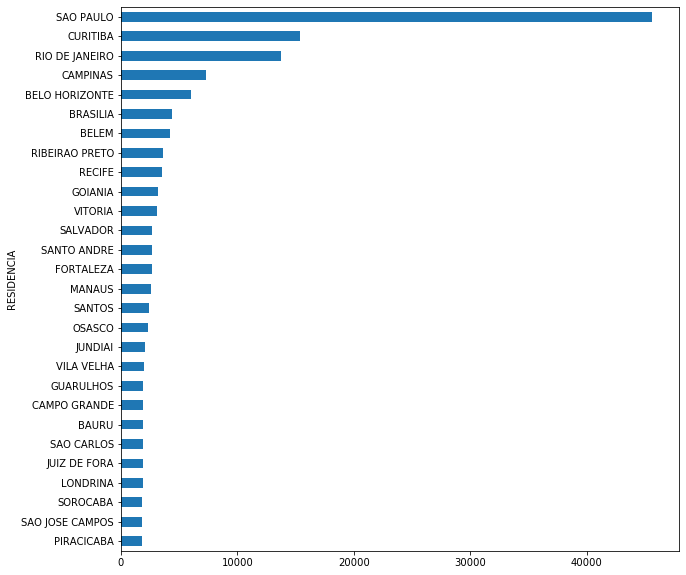

In [16]:
dados.groupby('RESIDENCIA').size().sort_values().tail(28).plot(kind='barh', figsize=(10,10))

 #SAO PAULO TEVE O MAIOR NUMERO DE PESSOAS

In [23]:
# Criando gráfico

graf = go.Bar(x = [     'SAO PAULO', 
                        'SAO JOSE CAMPOS',
                        'MOGI DAS CRUZES',
                        'JACAREI',
                    ],
                    y = [45621, 1811 , 929, 565],
                    marker = {'color': '#00FFFF'})

# Criando Layout
layoutsp = go.Layout(title='Pessoas que prestaram ENEM em 1999',
                   yaxis={'title':'Média das presenças'},
                   barmode = 'stack')

# Criando figura que será exibida
figsp = go.Figure(data=graf, layout=layoutsp)

py.iplot(figsp)

#em sp teve o maior numero de pessoas fazendo ENEM